In [35]:
import sys
sys.path.append('/u/ajagadish/ermi/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
from collections import Counter, defaultdict
from wordcloud import WordCloud
from mycolorpy import colorlist as mcp
import math
import matplotlib as mpl
from matplotlib.cm import get_cmap
FONTSIZE=20
SYS_PATH = '/u/ajagadish/ermi' 

### experiment 2

In [47]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
model_name  =  'task=binz2022_experiment=2_source=claude_condition=direction_loss=nll_paired=True_policy=greedy'
# ERMI (unknown): 'task=binz2022_experiment=2_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy'
# MI(unknown): 'task=binz2022_experiment=2_source=synthetic_condition=unknown_loss=nll_paired=True_policy=greedy'
# ERMI (direction):'task=binz2022_experiment=2_source=claude_condition=direction_loss=nll_paired=True_policy=greedy'
# MI (direction): 'task=binz2022_experiment=2_source=synthetic_condition=direction_loss=nll_paired=True_policy=greedy'
results_mi_paired = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/{model_name}.npz')
ginis_mi_unknown = np.zeros_like(results_mi_paired['model_coefficients'][...,[0]])
for participant in range(results_mi_paired['model_coefficients'].shape[0]):
    for task in range(results_mi_paired['model_coefficients'].shape[1]):
        for trial in range(results_mi_paired['model_coefficients'].shape[2]):
            ginis_mi_unknown[participant, task, trial]= gini_compute(np.abs(results_mi_paired['model_coefficients'][participant, task, trial]))

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the mark

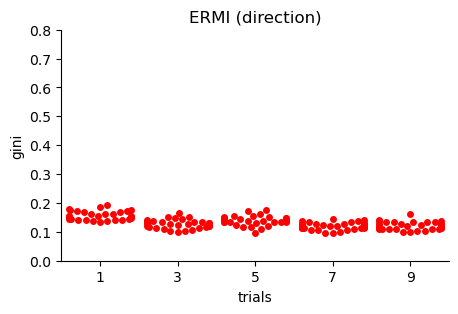

In [48]:
# Initialize a list to accumulate data for each trial
all_trials_data = []
# Loop through each trial and append the data for each run to the list
for trial in range(1, ginis_mi_unknown.shape[2], 2):
    trial_data = ginis_mi_unknown[:, :, trial].squeeze().mean(0)
    all_trials_data.append(trial_data)

# Flatten the list of lists into a DataFrame
df = pd.DataFrame({
    'gini': [item for sublist in all_trials_data for item in sublist],
    'trial': [trial*2+1 for trial, sublist in enumerate(all_trials_data) for _ in sublist]
})

# Create a swarm plot for each trial using the accumulated data
plt.figure(figsize=(5, 3))
sns.swarmplot(x='trial', y='gini', data=df, c='r')#, label='ranked')

plt.ylim([0., 0.8])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.title(f"ERMI (direction)")
# plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

### experiment 1

In [30]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
model_name  = 'task=binz2022_experiment=1_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy'
# ERMI (unknown): 'task=binz2022_experiment=1_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy'
# MI(unknown): 'task=binz2022_experiment=1_source=synthetic_condition=unknown_loss=nll_paired=True_policy=greedy'
# ERMI (rank):'task=binz2022_experiment=1_source=claude_condition=rank_loss=nll_paired=True_policy=greedy'
# MI (rank): 'env=synthetic_dim4_model=transformer_num_episodes100000_num_hidden=256_lr0.0003_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_run=0_ranking_binz2022'
results_mi_paired = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/{model_name}.npz')
ginis_mi_unknown = np.zeros_like(results_mi_paired['model_coefficients'][...,[0]])
for participant in range(results_mi_paired['model_coefficients'].shape[0]):
    for task in range(results_mi_paired['model_coefficients'].shape[1]):
        for trial in range(results_mi_paired['model_coefficients'].shape[2]):
            ginis_mi_unknown[participant, task, trial]= gini_compute(np.abs(results_mi_paired['model_coefficients'][participant, task, trial]))

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


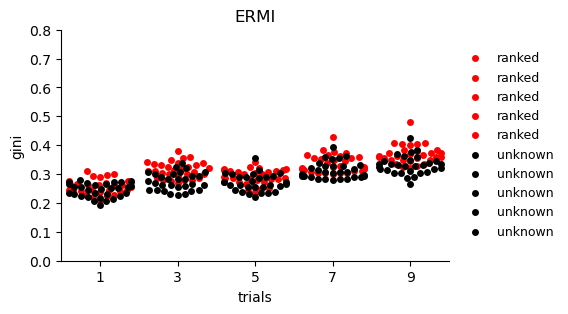

In [33]:
# Initialize a list to accumulate data for each trial
all_trials_data = []
# Loop through each trial and append the data for each run to the list
for trial in range(1, ginis_mi_unknown.shape[2], 2):
    trial_data = ginis_mi_unknown[:, :, trial].squeeze().mean(0)
    all_trials_data.append(trial_data)

# Create a DataFrame for easier plotting with seabor0
import pandas as pd

# Flatten the list of lists into a DataFrame
df2 = pd.DataFrame({
    'gini': [item for sublist in all_trials_data for item in sublist],
    'trial': [trial*2+1 for trial, sublist in enumerate(all_trials_data) for _ in sublist]
})

# Create a swarm plot for each trial using the accumulated data
plt.figure(figsize=(5, 3))
sns.swarmplot(x='trial', y='gini', data=df, c='r', label='ranked')
sns.swarmplot(x='trial', y='gini', data=df2, c='k', label='unknown')

plt.ylim([0., 0.8])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.title(f"ERMI")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

# hyper parameter search

## L2 Regularisation

## constrained modelsm

error
20.0


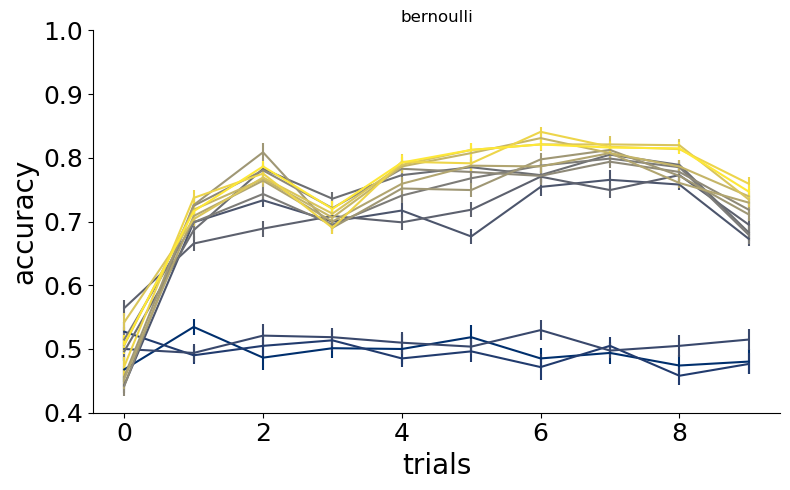

In [36]:
experiment_id = 3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max() + 1
policy = 'bernoulli'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

FIGSIZE = (8, 5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)

ess_list = []
mean_accs = []
esses = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] + [12.0, 14.0, 16.0, 18.0, 20.0]
cmap = mpl.colormaps.get_cmap('cividis') # Generate colors from a colormap
colors = [cmap(i) for i in np.linspace(0., 1., len(esses))]  # Adjust the number of colors as needed

for i, ess in enumerate(esses):
    try:
        results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float(ess))}_std0.1_run=1_constraintTrue_schedulefree_binz2022.npz')
                                          
        ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
                    yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
                    label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1])
        mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
        
        ess_list.append(ess)
    except:
        print('error')
        print(str(float(ess)))

ax.set_xlabel('trials', fontsize=FONTSIZE)
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE - 2)
plt.yticks(fontsize=FONTSIZE - 2)
plt.title(f'{policy}')
plt.ylim(0.4, 1.0)
# plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.05), frameon=False, fontsize=FONTSIZE - 10)
sns.despine()
f.tight_layout()
plt.show()

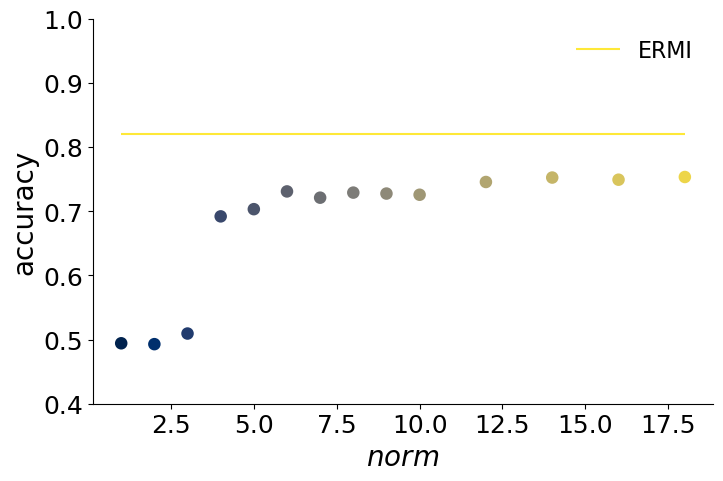

In [38]:
ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
FIGSIZE = (8,5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.scatter(ess_list, mean_accs, lw=3, color=colors[:-1])
ax.hlines((ermi_acc['per_trial_model_accuracy']/num_tasks).mean(), xmin=min(ess_list), xmax=max(ess_list), color=colors[-1], ls='-', label='ERMI')
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
ax.set_xlabel('$norm$', fontsize=FONTSIZE)
# ax.set_xscale('log')
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.ylim(0.4, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(frameon=False,fontsize=FONTSIZE-4)
plt.show()

### annealed models

/tmp/ipykernel_97173/3178489176.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('cividis_r')


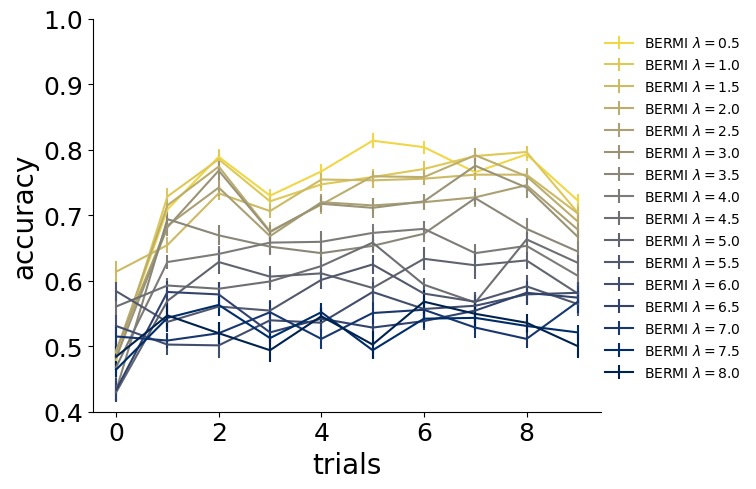

In [49]:
experiment_id = 3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max() + 1
policy = 'greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

FIGSIZE = (8, 5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')

ess_list = []
mean_accs = []
norms_list = []
esses = [0.5, 1., 1.5, 2., 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
# Generate colors from a colormap
cmap = get_cmap('cividis_r')
colors = [cmap(i) for i in np.linspace(0., 1., len(esses)+1)]  # Adjust the number of colors as needed


# ax.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).mean(0),
#             yerr=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
#             label='ERMI', c=colors[0])
for i, ess in enumerate(esses):
    try:
        # if ess==0.0:
        #     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess0.0_std0.1_run=1_essinit0.001_annealed_schedulefree_binz2022.npz')
        # else:
        results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float(ess))}_std0.1_run=1_essinit0.001_annealed_schedulefree_binz2022.npz')    
        ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
                    yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
                    label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1])
        mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
        ess_list.append(ess)
        norms_list.append(results_bermi_paired_ess['l2_norms'].mean())
    except:
        print('error')
        print(ess)

ax.set_xlabel('trials', fontsize=FONTSIZE)
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE - 2)
plt.yticks(fontsize=FONTSIZE - 2)
plt.ylim(0.4, 1.0)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.05), frameon=False, fontsize=FONTSIZE - 10)
sns.despine()
f.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


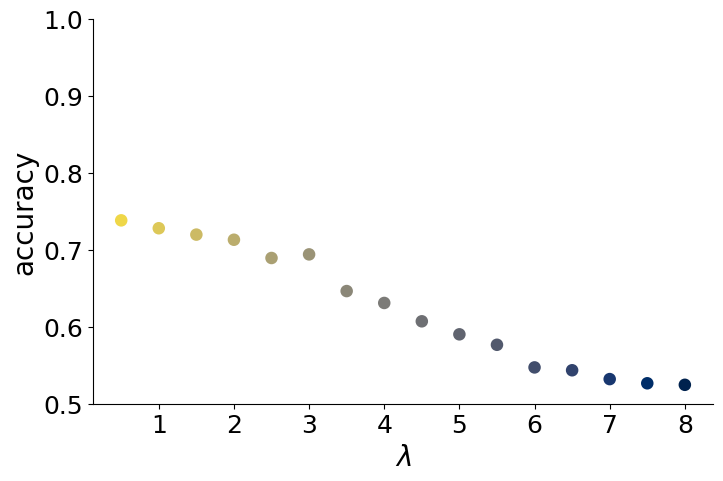

In [52]:
ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
FIGSIZE = (8,5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.scatter(ess_list, mean_accs, lw=3, color=colors[1:])
# ax.hlines((ermi_acc['per_trial_model_accuracy']/num_tasks).mean(), xmin=min(ess_list), xmax=max(ess_list), color=colors[0],ls='-', label='ERMI')
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
ax.set_xlabel('$\lambda$', fontsize=FONTSIZE)
# ax.set_xscale('log')
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.ylim(0.5, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(frameon=False,fontsize=FONTSIZE-4)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


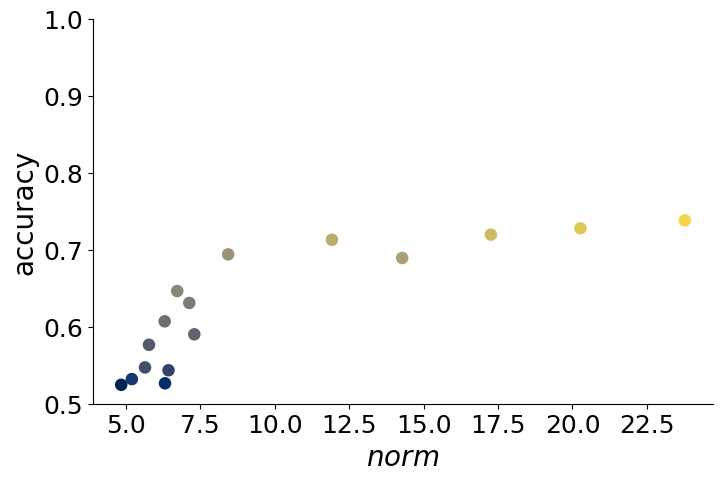

In [57]:
ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
FIGSIZE = (8,5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.scatter(norms_list, mean_accs, lw=3, color=colors[1:])
# ax.hlines((ermi_acc['per_trial_model_accuracy']/num_tasks).mean(), xmin=min(ess_list), xmax=max(ess_list), color=colors[0],ls='-', label='ERMI')
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
ax.set_xlabel('$norm$', fontsize=FONTSIZE)
# ax.set_xscale('log')
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.
ylim(0.5, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(frameon=False,fontsize=FONTSIZE-4)
plt.show()

In [120]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
ginis_bermi =np.zeros((len(esses),) + results_bermi_paired_ess['model_coefficients'][...,[0]].shape)
ginis_ermi_unknown = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
# ginis_mi = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
for i, ess in enumerate(esses):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float(ess))}_std0.1_run=1_essinit0.001_annealed_schedulefree.npz')
    for participant in range(results_bermi_paired_ess['model_coefficients'].shape[0]):
        for task in range(results_bermi_paired_ess['model_coefficients'].shape[1]):
            for trial in range(results_bermi_paired_ess['model_coefficients'].shape[2]):
                ginis_bermi[i, participant, task, trial]= gini_compute(np.abs(results_bermi_paired_ess['model_coefficients'][participant, task, trial]))
                ginis_ermi_unknown[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_unknown['model_coefficients'][participant, task, trial]))
                # ginis_mi[participant, task, trial]= gini_compute(np.abs(results_mi_paired_unknown['model_coefficients'][participant, task, trial]))

In [167]:
low_lambda = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float("0.5"))}_std0.1_run=1_essinit0.001_annealed_schedulefree.npz')
# low_lambda['model_coefficients'].squeeze().mean(1)

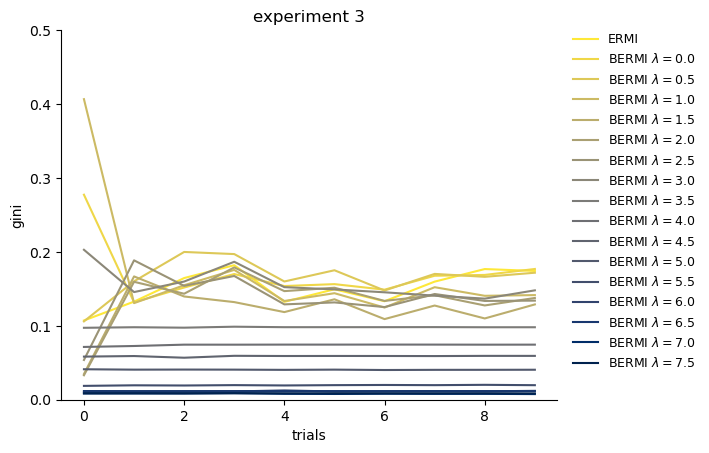

In [168]:
plt.plot(ginis_ermi_unknown.squeeze().mean(1).mean(0), label='ERMI', c=colors[0])
for i, ess in enumerate(esses):
    plt.plot(ginis_bermi[i].squeeze().mean(1).mean(0), label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1])
# plt.plot(ginis_mi.squeeze().mean(1).mean(0), label='MI')
plt.ylim([0., 0.5])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.title(f"experiment {experiment_id}")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

In [169]:
low_lambda = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float("0.5"))}_std0.1_run=1_essinit0.001_annealed_schedulefree.npz')
high_lambda = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=8_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float("7.5"))}_std0.1_run=1_essinit0.001_annealed_schedulefree.npz')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


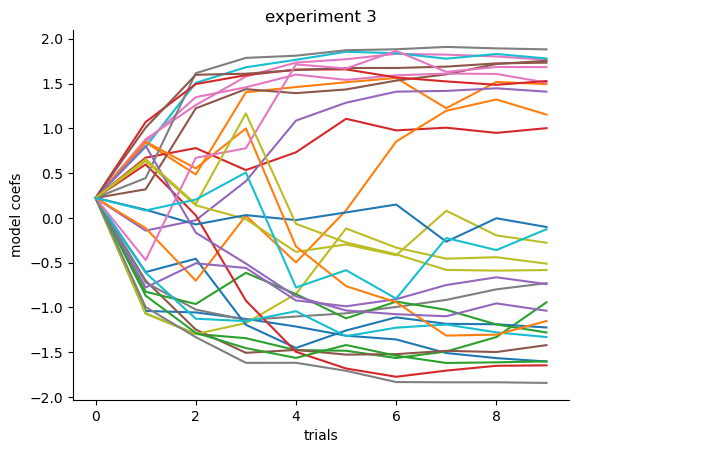

In [170]:
# plt.plot(low_lambda['model_coefficients'].squeeze()[0][...,0].T)#, label='ERMI', c=colors[0])
plt.plot(low_lambda['model_coefficients'].squeeze()[0][...,1].T)#, label='ERMI', c=colors[0])

plt.ylabel('model coefs')
plt.xlabel('trials')
sns.despine()
plt.title(f"experiment {experiment_id}")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


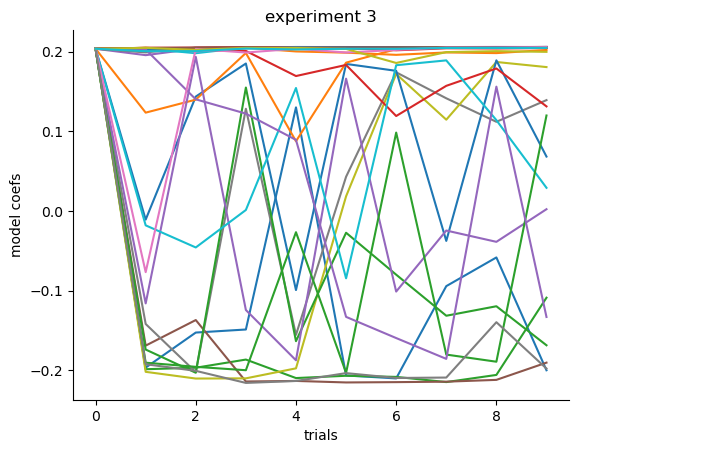

In [165]:
plt.plot(high_lambda['model_coefficients'].squeeze()[0][...,0].T)#, label='ERMI', c=colors[0])
# plt.plot(high_lambda['model_coefficients'].squeeze()[0][...,1].T)#, label='ERMI', c=colors[0])

plt.ylabel('model coefs')
plt.xlabel('trials')
sns.despine()
plt.title(f"experiment {experiment_id}")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


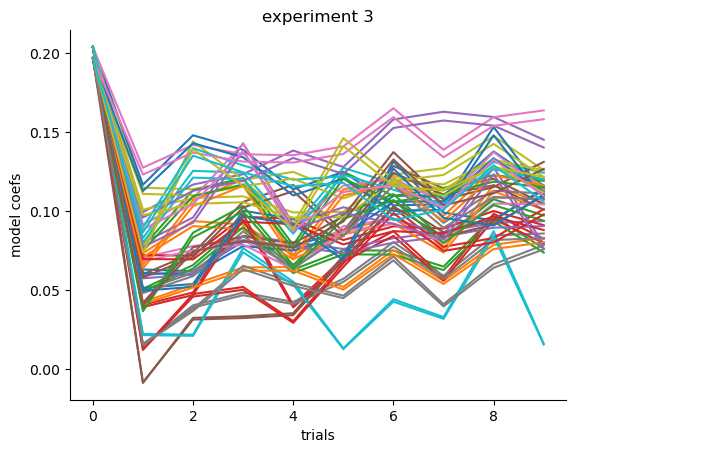

In [149]:
plt.plot(high_lambda['model_coefficients'].squeeze().mean(0)[...,0].T)#, label='ERMI', c=colors[0])
plt.plot(high_lambda['model_coefficients'].squeeze().mean(0)[...,1].T)#, label='ERMI', c=colors[0])

plt.ylabel('model coefs')
plt.xlabel('trials')
sns.despine()
plt.title(f"experiment {experiment_id}")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
plt.show()

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use

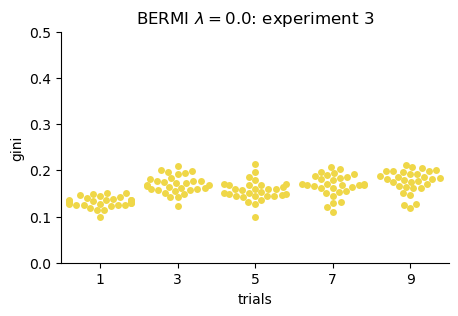

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use 

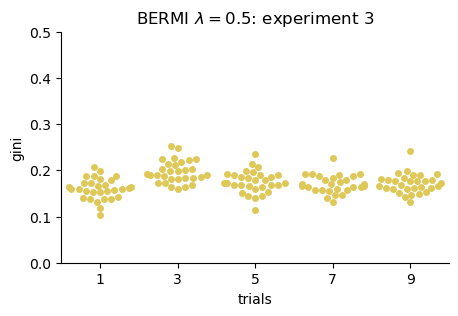

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use

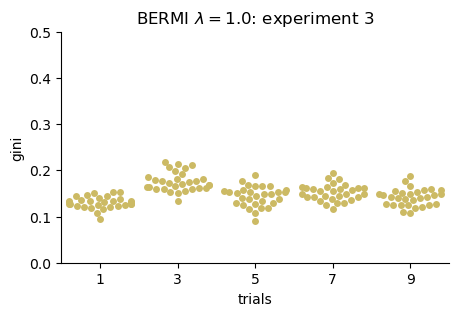

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use 

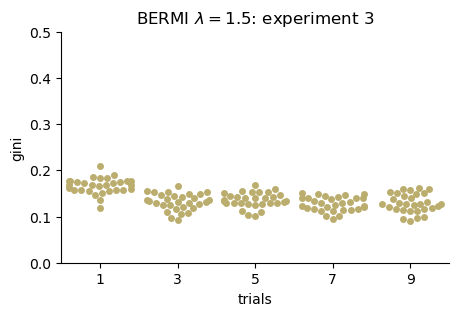

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use 

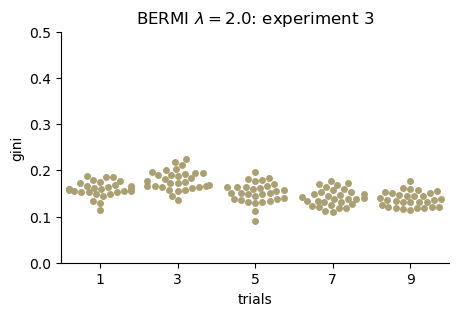

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use

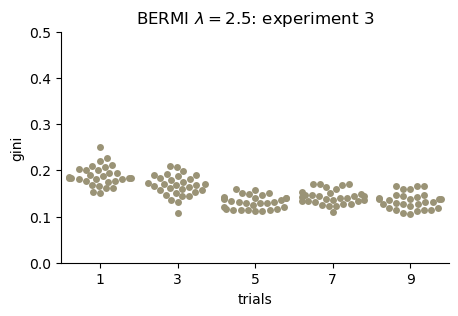

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use 

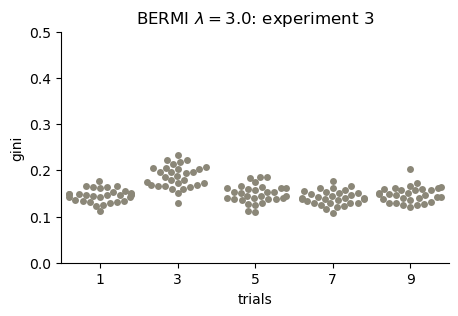

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use

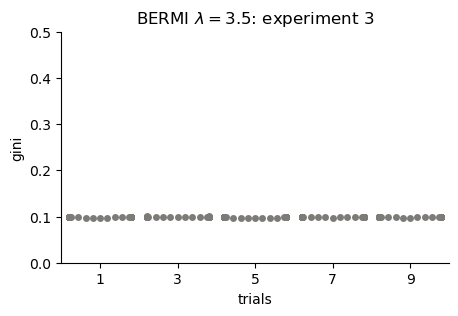

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use

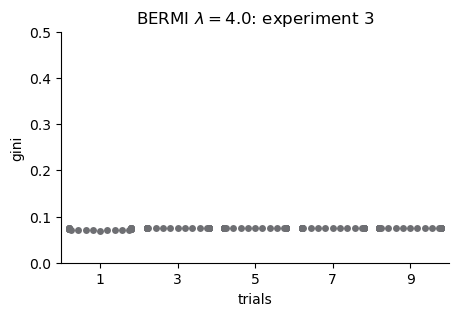

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


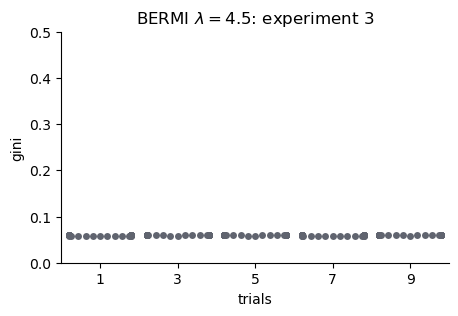

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


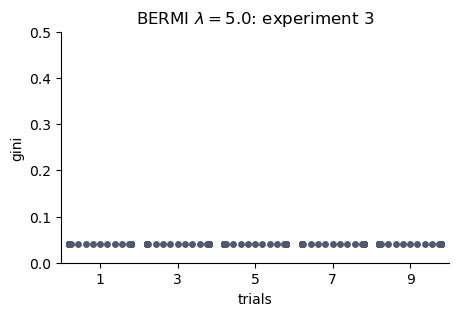

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


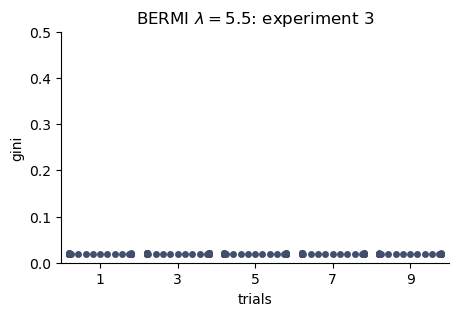

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use

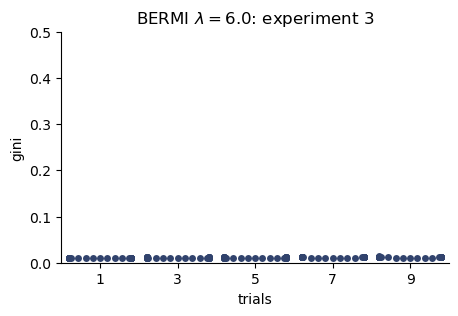

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


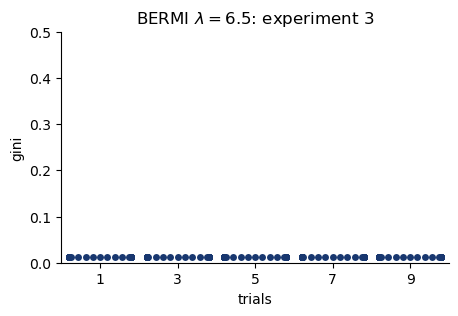

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


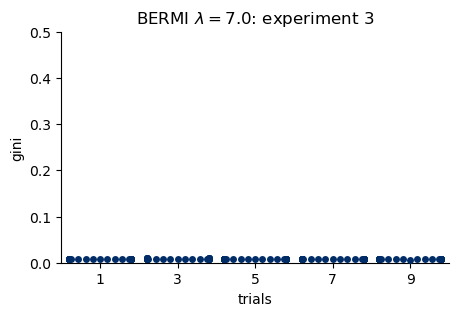

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:356: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2023.03/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use

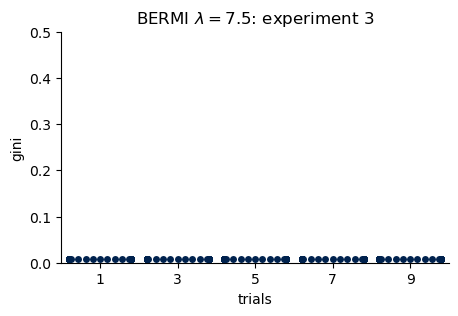

In [174]:
for i, ess in enumerate(esses):
    # Initialize a list to accumulate data for each trial
    all_trials_data = []
    # Loop through each trial and append the data for each run to the list
    for trial in range(1, ginis_ermi_unknown.shape[2], 2):
        trial_data = ginis_bermi[i][:, :, trial].squeeze().mean(0)
        all_trials_data.append(trial_data)

    # Create a DataFrame for easier plotting with seabor0
    import pandas as pd

    # Flatten the list of lists into a DataFrame
    df = pd.DataFrame({
        'gini': [item for sublist in all_trials_data for item in sublist],
        'trial': [trial*2+1 for trial, sublist in enumerate(all_trials_data) for _ in sublist]
    })

    # Create a swarm plot for each trial using the accumulated data
    plt.figure(figsize=(5, 3))
    sns.swarmplot(x='trial', y='gini', data=df, c=colors[i + 1])

    plt.ylim([0., 0.5])
    plt.ylabel('gini')
    plt.xlabel('trials')
    sns.despine()
    plt.title(f"BERMI $\lambda={str(ess)}$: experiment {experiment_id}")
    # plt.legend(loc='lower right', bbox_to_anchor=(1.3, .05), frameon=False, fontsize=FONTSIZE - 11)
    plt.show()

### no-annealing

/tmp/ipykernel_97659/3576175842.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('cividis_r')


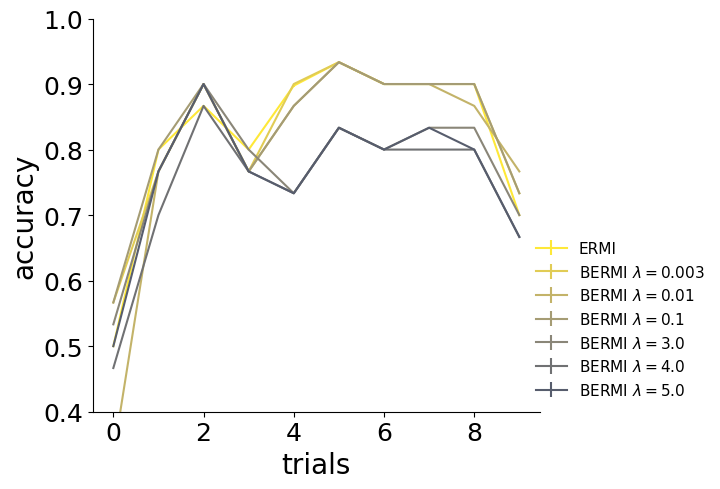

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

experiment_id = 3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max() + 1
policy = 'greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

FIGSIZE = (8, 5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')

# Generate colors from a colormap
cmap = get_cmap('cividis_r')
colors = [cmap(i) for i in np.linspace(0., 1., 10)]  # Adjust the number of colors as needed

ess_list = []
mean_accs = []
esses = [0.003, 0.01, 0.1, 3.0, 4.0, 5.0]
ax.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).mean(0),
            yerr=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
            label='ERMI', c=colors[0])
counter = 1
for i, ess in enumerate(esses):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0003_num_layers=2_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossnll_ess{str(float(ess))}_std0.1_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
                yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
                label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1])
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
    ess_list.append(ess)
    counter +=1
    
# Lcounter=counter
# esses = range(210, 2910, 300)
# for i, ess in enumerate(esses):
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
#     ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1 + Lcounter])
#     mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())  
#     ess_list.append(ess)
#     counter +=1

# Lcounter=counter
# esses_2 = range(3010, 11010, 2000)
# for i, ess in enumerate(esses_2):
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
#     ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
#                 yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
#                 label=f'BERMI $\lambda={str(ess)}$', c=colors[i + Lcounter + 1])
#     mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
#     ess_list.append(ess)
#     counter +=1
    

ax.set_xlabel('trials', fontsize=FONTSIZE)
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE - 2)
plt.yticks(fontsize=FONTSIZE - 2)
plt.ylim(0.4, 1.0)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.0), frameon=False, fontsize=FONTSIZE - 9)
sns.despine()
f.tight_layout()
plt.show()

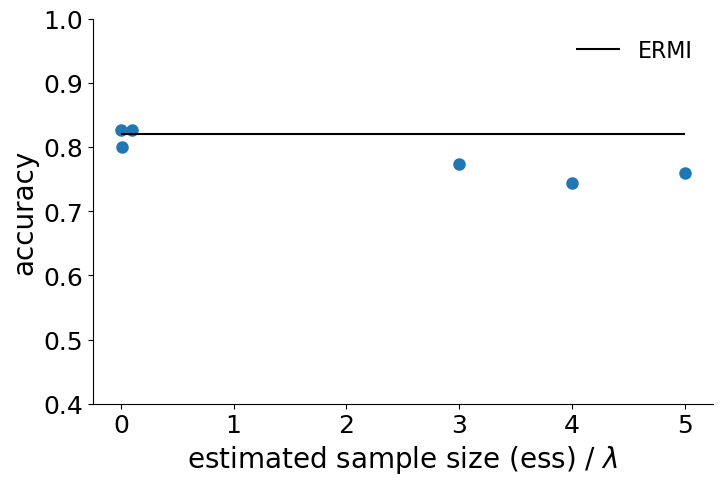

In [10]:
ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
FIGSIZE = (8,5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.scatter(ess_list, mean_accs, lw=3)
ax.hlines((ermi_acc[
    'per_trial_model_accuracy']/num_tasks).mean(), xmin=min(ess_list), xmax=max(ess_list), color='k',ls='-', label='ERMI')
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
ax.set_xlabel('estimated sample size (ess) / $\lambda$', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.ylim(0.4, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(frameon=False,fontsize=FONTSIZE-4)
plt.show()

## Variational learning

/tmp/ipykernel_88298/1300232485.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('cividis_r')


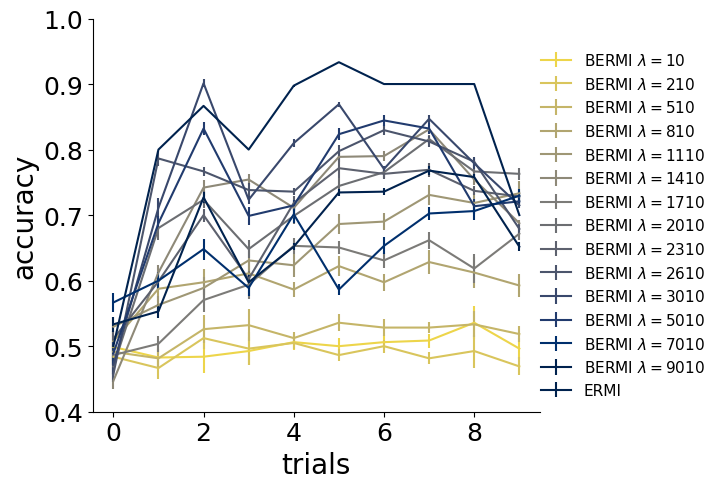

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap

experiment_id = 3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max() + 1
policy = 'greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

FIGSIZE = (8, 5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')

# Generate colors from a colormap
cmap = get_cmap('cividis_r')
colors = [cmap(i) for i in np.linspace(0., 1., 15)]  # Adjust the number of colors as needed

ess_list = []
mean_accs = []
esses = [10]
counter = 0
for i, ess in enumerate(esses):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
                yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
                label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1])
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
    ess_list.append(ess)
    counter +=1
    
Lcounter=counter
esses = range(210, 2910, 300)
for i, ess in enumerate(esses):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$', c=colors[i + 1 + Lcounter])
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())  
    ess_list.append(ess)
    counter +=1

Lcounter=counter
esses_2 = range(3010, 11010, 2000)
for i, ess in enumerate(esses_2):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean(0),
                yerr=(results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
                label=f'BERMI $\lambda={str(ess)}$', c=colors[i + Lcounter + 1])
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy'] / num_tasks).mean())
    ess_list.append(ess)
    counter +=1
    

ax.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).mean(0),
            yerr=(results_ermi_paired_unknown['per_trial_model_accuracy'] / num_tasks).std(0) / np.sqrt(num_tasks),
            label='ERMI', c=colors[counter])

ax.set_xlabel('trials', fontsize=FONTSIZE)
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE - 2)
plt.yticks(fontsize=FONTSIZE - 2)
plt.ylim(0.4, 1.0)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.0), frameon=False, fontsize=FONTSIZE - 9)
sns.despine()
f.tight_layout()
plt.show()

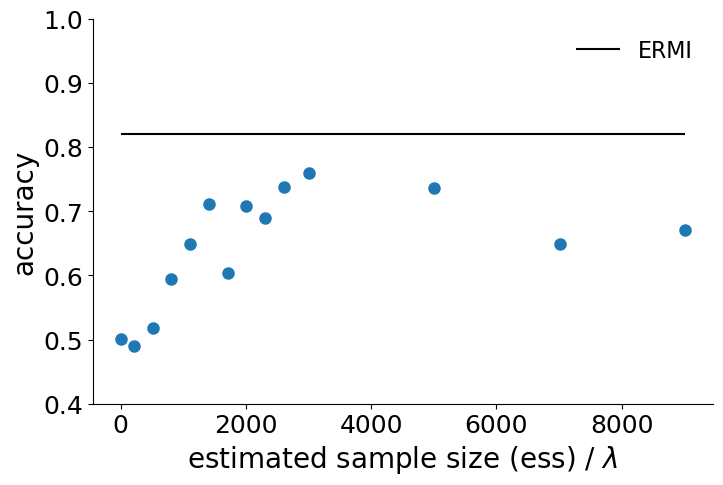

In [61]:
ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
FIGSIZE = (8,5)
FONTSIZE = 20
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.scatter(ess_list, mean_accs, lw=3)
ax.hlines((ermi_acc[
    'per_trial_model_accuracy']/num_tasks).mean(), xmin=min(ess_list), xmax=max(ess_list), color='k',ls='-', label='ERMI')
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
ax.set_xlabel('estimated sample size (ess) / $\lambda$', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.ylim(0.4, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(frameon=False,fontsize=FONTSIZE-4)
plt.show()

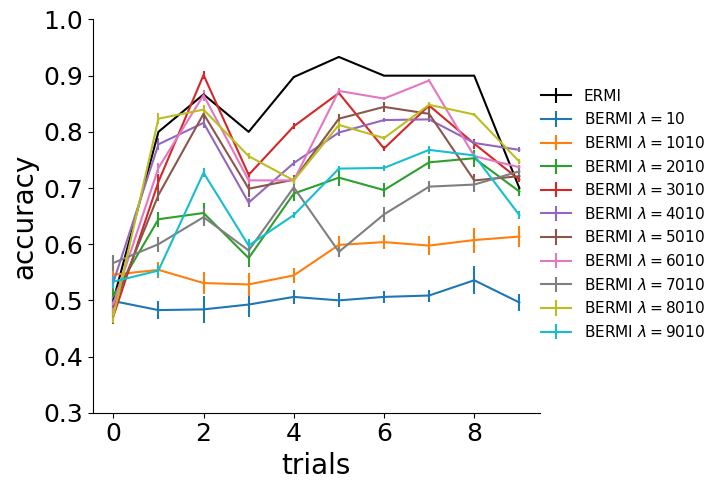

In [52]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

FIGSIZE = (8,5)
FONTSIZE = 20
# compare mean BICS across models in a bar plot
f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
ax.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

# 10
ess_list = []
mean_accs = []
esses = [10]
for ess in esses:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())  
    ess_list.append(ess)

# # 1010 TO 19010
esses = range(1010, 10010, 1000)
for ess in esses:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
    mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())  
    ess_list.append(ess)
    
# # # 20000 TO 29000
# esses = range(20000, 29000, 1000)
# for ess in esses:
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
#     ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
#     mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())
#     ess_list.append(ess)

# # # 31K TO 50K    
# esses = range(31000, 51000, 1000)
# for ess in esses:
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
#     ax.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
#     mean_accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean())
#     ess_list.append(ess)

# set colors depending on number of models in MODELS

ax.set_xlabel('trials', fontsize=FONTSIZE)
ax.set_ylabel('accuracy', fontsize=FONTSIZE)
plt.xticks(fontsize=FONTSIZE-2)
plt.yticks(fontsize=FONTSIZE-2)
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.15), frameon=False, fontsize=FONTSIZE-9)
sns.despine()
f.tight_layout()
# plt.title(f" all weight reg from scratch (32 units, 4 layers): experiment {experiment_id}")
plt.show()

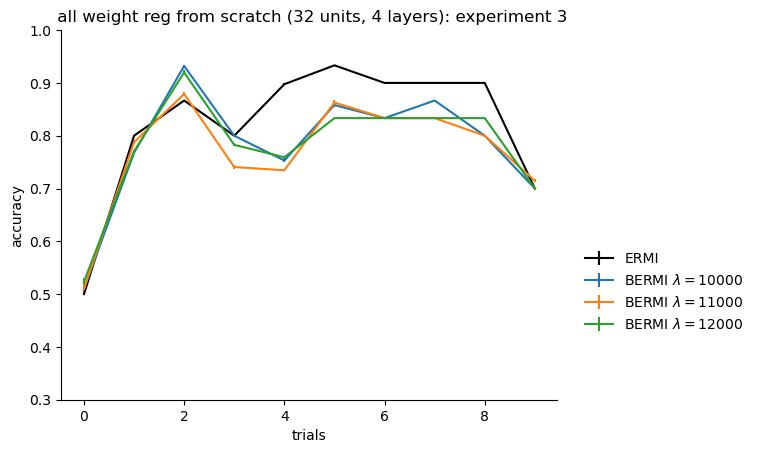

In [12]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

esses = [range(10000, 13000, 1000)
for ess in esses:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.15),frameon=False)
plt.title(f" all weight reg from scratch (32 units, 4 layers): experiment {experiment_id}")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


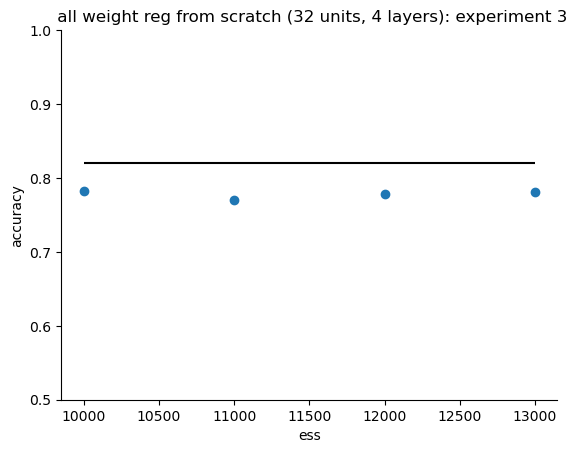

In [10]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')


mean_accs = []
for ess in esses:
    acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    mean_accs.append((acc['per_trial_model_accuracy']/num_tasks).mean())

ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
plt.scatter(esses, mean_accs)
plt.hlines((ermi_acc['per_trial_model_accuracy']/num_tasks).mean(), xmin=min(esses), xmax=max(esses), color='k',ls='-')
plt.ylabel('accuracy')
plt.xlabel('ess')
plt.ylim(0.5, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f" all weight reg from scratch (32 units, 4 layers): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

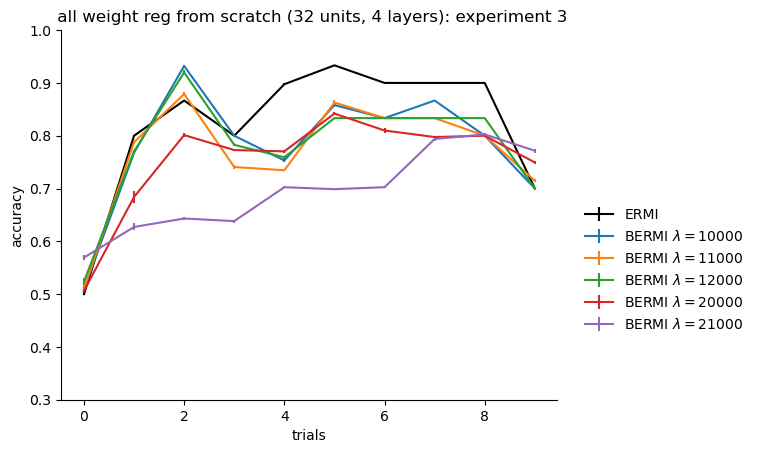

In [7]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')


esses = range(10000, 13000, 1000)
for ess in esses:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
    
    
esses = range(20000, 22000, 1000)
for ess in esses:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')
    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0.15),frameon=False)
plt.title(f" all weight reg from scratch (32 units, 4 layers): experiment {experiment_id}")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


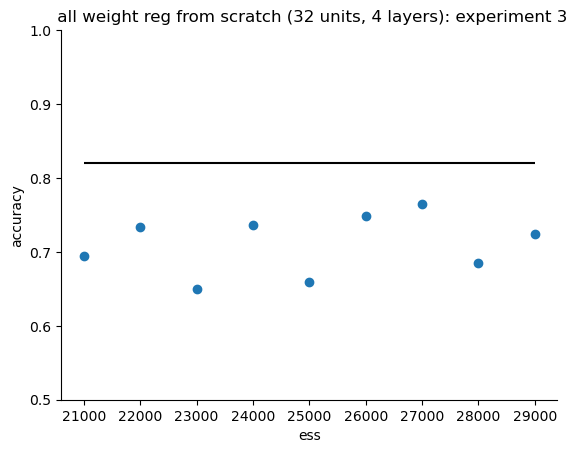

In [86]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')


mean_accs = []
esses = range(21000, 30000, 1000)
for ess in esses:
    acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.0001_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std1.0_run=0.npz')
    mean_accs.append((acc['per_trial_model_accuracy']/num_tasks).mean())

ermi_acc = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')      
plt.scatter(esses, mean_accs)
plt.hlines((ermi_acc['per_trial_model_accuracy']/num_tasks).mean(), xmin=min(esses), xmax=max(esses), color='k',ls='-')
plt.ylabel('accuracy')
plt.xlabel('ess')
plt.ylim(0.5, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f" all weight reg from scratch (32 units, 4 layers): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

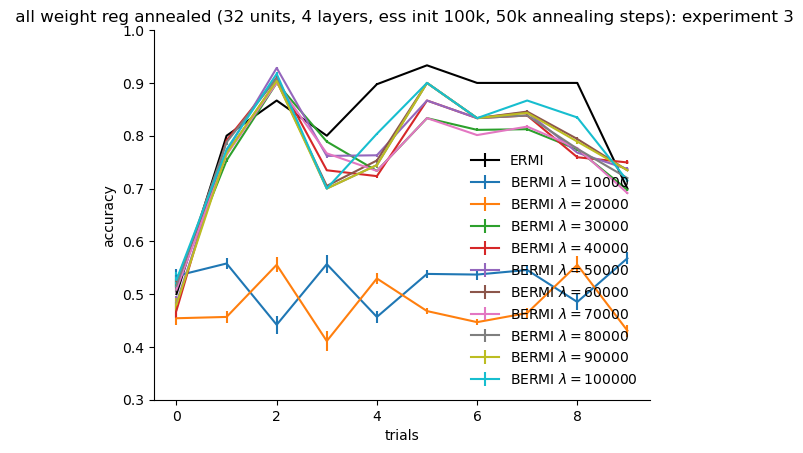

In [44]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')


for ess in [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_essinit100000.0_annealed.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f" all weight reg annealed (32 units, 4 layers, ess init 100k, 50k annealing steps): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

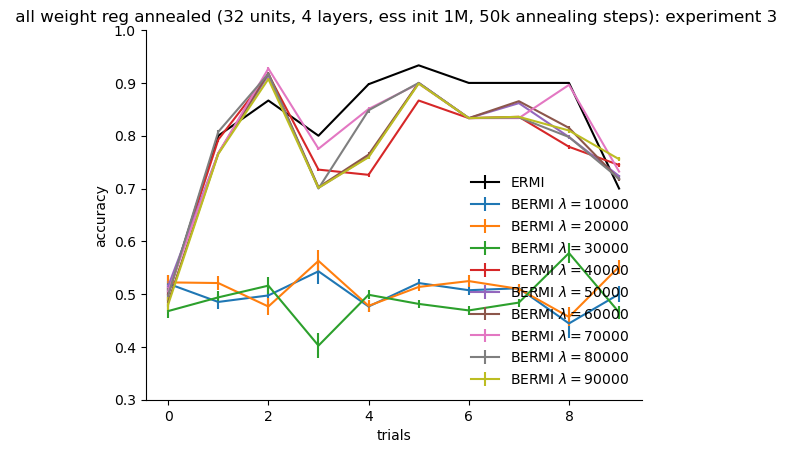

In [46]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')


for ess in [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_essinit1000000.0_annealed.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f" all weight reg annealed (32 units, 4 layers, ess init 1M, 50k annealing steps): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

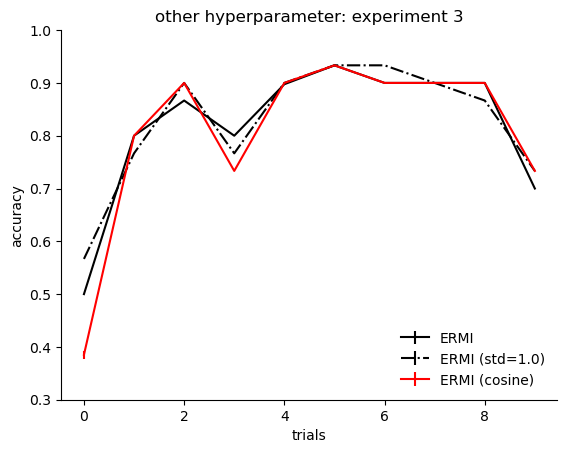

In [19]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std1.0_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI (std=1.0)', c='k', ls='-.')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0_cosineschedular.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI (cosine)', c='r')


plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"other hyperparameter: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

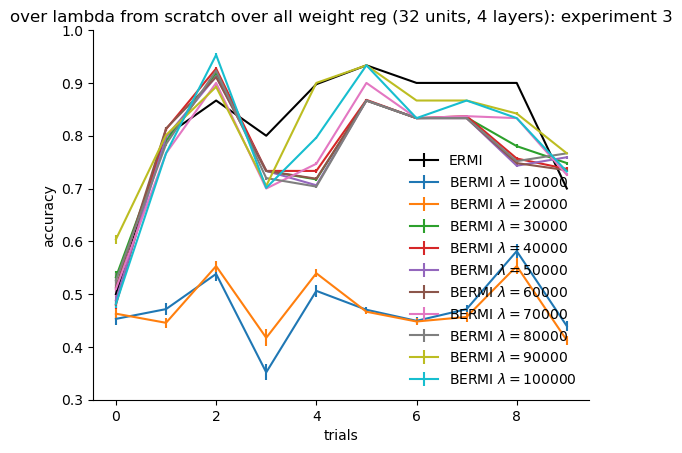

In [34]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda from scratch over all weight reg (32 units, 4 layers): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

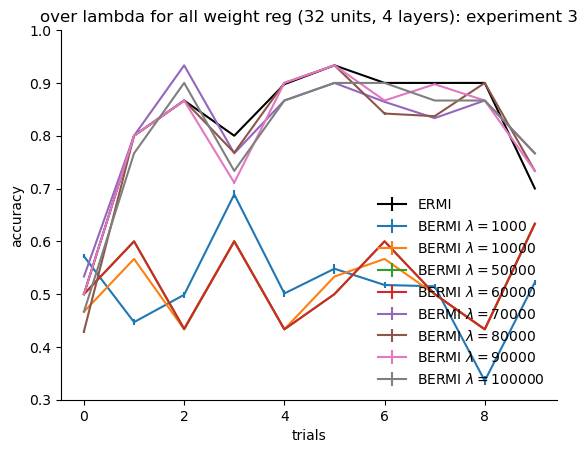

In [15]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [1000, 10000, 50000, 60000, 70000, 80000, 90000, 100000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_regall.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda for all weight reg (32 units, 4 layers): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

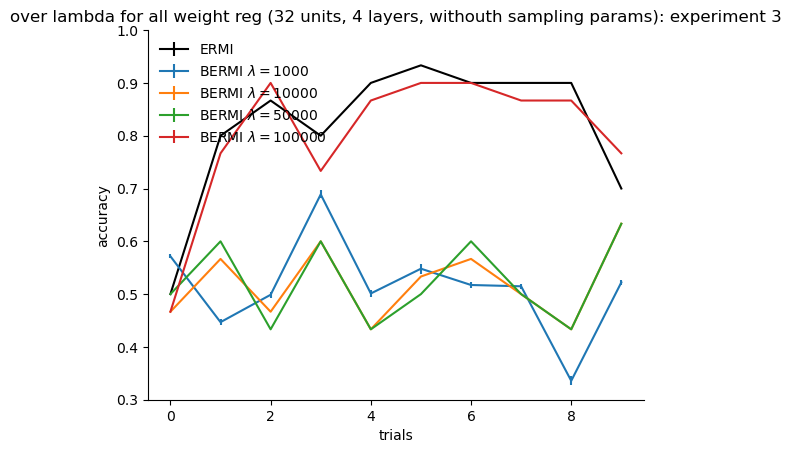

In [3]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [1000, 10000, 50000, 100000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=32_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_regall.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda for all weight reg (32 units, 4 layers, withouth sampling params): experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

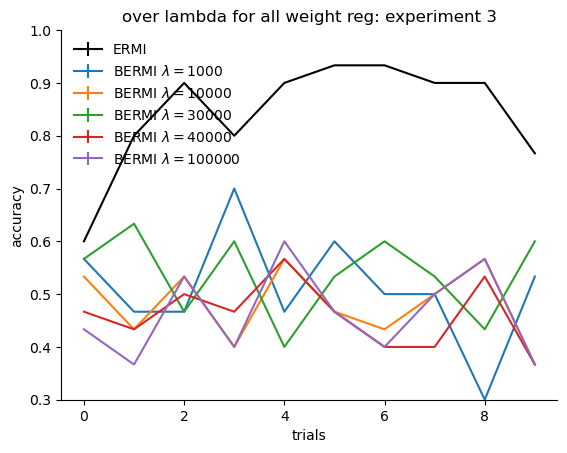

In [18]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [1000, 10000, 30000, 40000, 100000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes1000000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_regall.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

# for ess in [100000]:
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{str(int(ess))}_std0.1_run=0_regall.npz')
#     plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}, 100k$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda for all weight reg: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

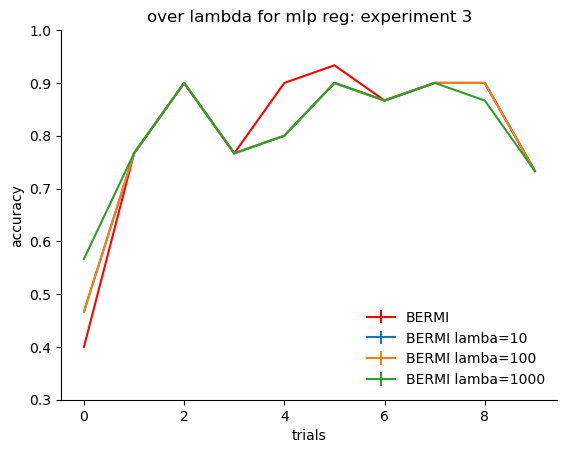

In [3]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1000000.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI', c='r')

# for ess in [10, 100, 1000, 10000, 50000]: #100000
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{ess}_std0.1_run=0_regmlp_only.npz')
#     plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI lamba={str(ess)}')
for ess in [10, 100, 1000]: #100000
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{ess}_std0.1_run=0_regmlp_only.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI lamba={str(ess)}, 300k')

    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda for mlp reg: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

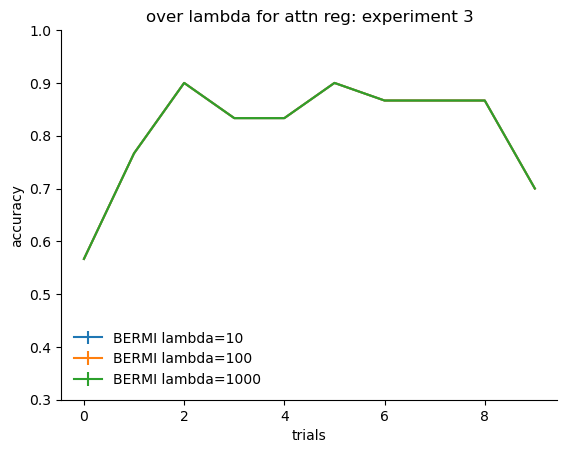

In [6]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1000000.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI', c='r')

# for ess in [1000, 10000]:
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{ess}_std0.1_run=0_regattn_only.npz')
#     plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI lambda={str(ess)}')

# for ess in [10, 100, 1000, 10000, 50000, 100000]:
#     results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes100000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{ess}_std0.1_run=0_regattn_only.npz')
#     plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI lambda={str(ess)}')
  
for ess in [10, 100, 1000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess{ess}_std0.1_run=0_regattn_only.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI lambda={str(ess)}, 300k')
  
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over lambda for attn reg: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

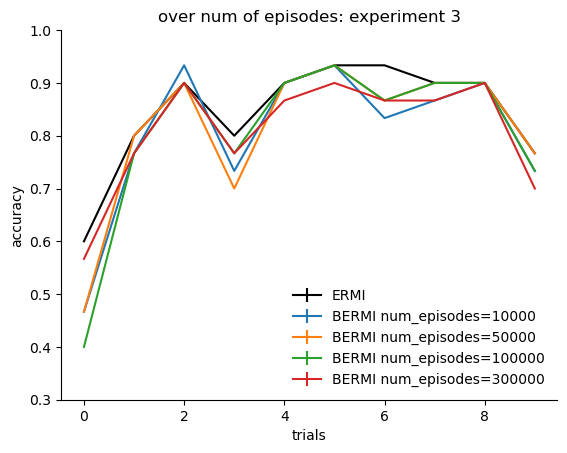

In [14]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1000000.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI', c='r')

for num_episodes in [10000, 50000, 100000, 300000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes{num_episodes}_num_hidden=256_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI num_episodes={str(num_episodes)}')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over num of episodes: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

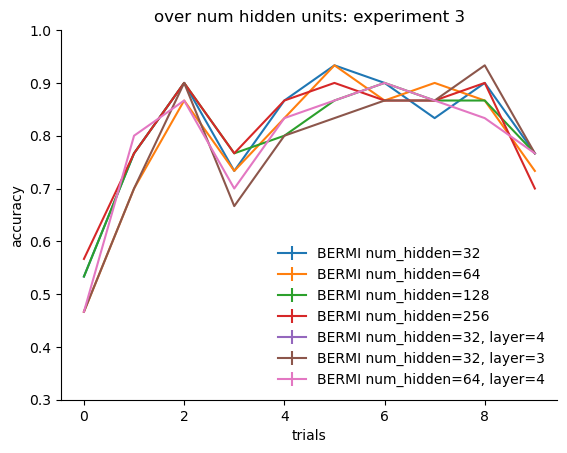

In [15]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

# results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1000000.npz')
# plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI', c='r')

for ess in [32, 64, 128, 256]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden={str(int(ess))}_lr0.1_num_layers=6_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI num_hidden={str(ess)}')

for ess in [32, 64]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden={str(int(ess))}_lr0.1_num_layers=4_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI num_hidden={str(ess)}, layer=4')
    
    if ess==32:
        results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden={str(int(ess))}_lr0.1_num_layers=3_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_ess1000000_std0.1_run=0.npz')
        plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI num_hidden={str(ess)}, layer=3')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over num hidden units: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

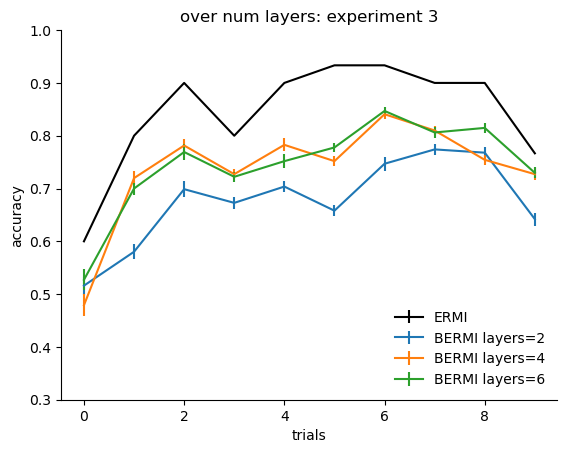

In [5]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [2, 4, 6]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/env=claude_dim2_model=transformer_num_episodes300000_num_hidden=256_lr0.1_num_layers={str(int(ess))}_d_model=64_num_head=8_noise0.0_shuffleTrue_pairedTrue_lossvariational_essNone_std0.1_run=0_ess=1000000.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI layers={str(ess)}')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"over num layers: experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

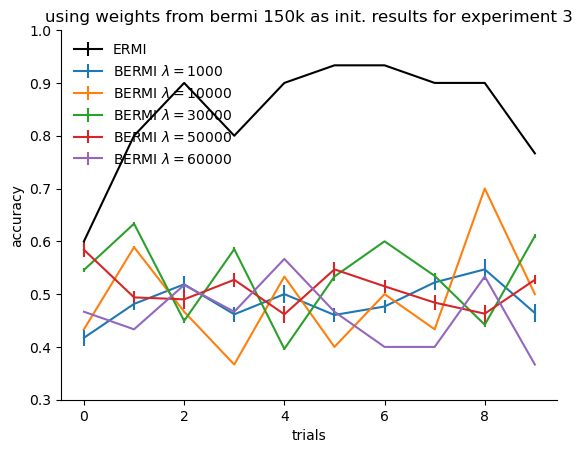

In [5]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [1000, 10000, 30000, 50000, 60000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=bernoulli_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"using weights from bermi 150k as init. results for experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

# Model fits

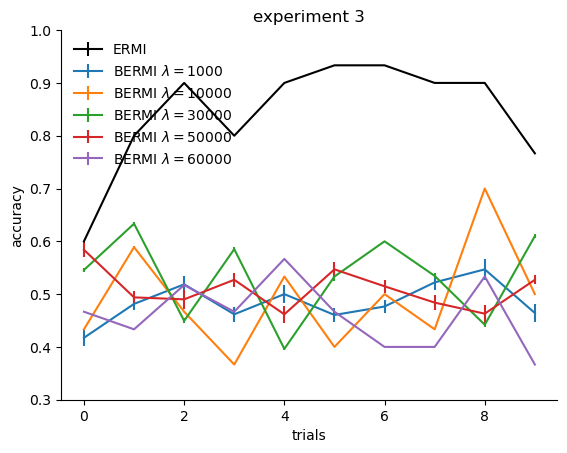

In [3]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [1000, 10000, 30000, 50000, 60000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=bernoulli_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

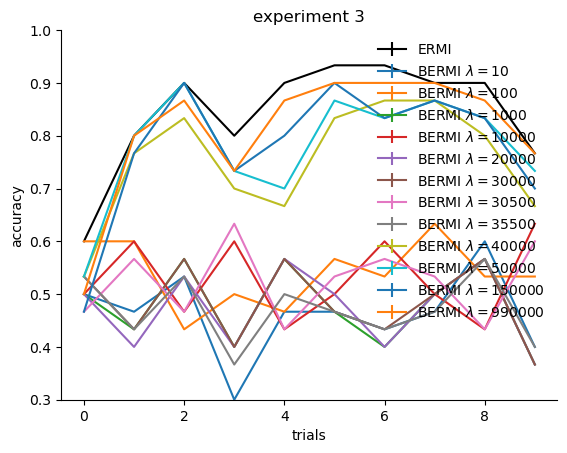

In [ ]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

for ess in [10, 100, 1000, 10000, 20000, 30000, 30500, 35500, 40000, 50000, 150000, 990000]:
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label=f'BERMI $\lambda={str(ess)}$')

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

/tmp/ipykernel_8335/3961042789.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


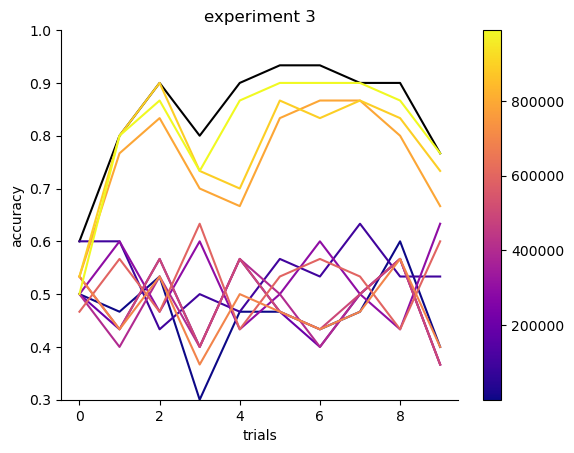

In [3]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

cmap = mpl.colormaps['plasma']
dls = [10, 100, 1000, 10000, 20000, 30000, 30500, 35500, 40000, 50000, 990000] #np.arange(30000, 40000, 500)
colors = cmap(np.linspace(0, 1, len(dls)))

for (c, ess) in zip(colors,dls):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0), 
                 yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks),
                 label=f'BERMI $\lambda={str(ess)}$',
                 color=c)

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend('', frameon=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=dls[0], vmax=dls[-1])
plt.colorbar(sm)
plt.show()

/tmp/ipykernel_8335/2141348149.py:30: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


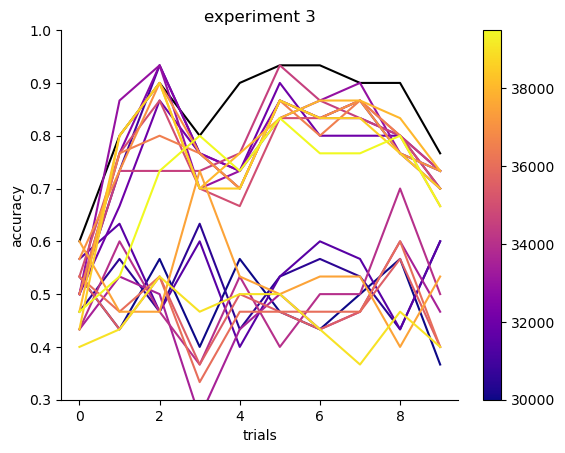

In [4]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI', c='k')

cmap = mpl.colormaps['plasma']
dls = np.arange(30000, 40000, 500)
colors = cmap(np.linspace(0, 1, len(dls)))

for (c, ess) in zip(colors,dls):
    results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess={str(int(ess))}.npz')
    plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0), 
                 yerr=(results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks),
                 label=f'BERMI $\lambda={str(ess)}$',
                 color=c)

plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend('', frameon=False)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_clim(vmin=dls[0], vmax=dls[-1])
plt.colorbar(sm)
plt.show()

In [5]:
accs = []
logs = []
esses = [] #[1, 10, 100, 1000]
# esses.extend([i for i in np.arange(10000, 100000, 10000)])
esses.extend([i for i in np.arange(30000, 40000, 100)])
lambdas = []
experiment_id=3
for ess in esses:
    try:
        results_bermi_paired_ess = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=bernoulli_ess={str(int(ess))}.npz')
        accs.append((results_bermi_paired_ess['per_trial_model_accuracy']/num_tasks).mean(0).mean())
        logs.append(results_bermi_paired_ess['expected_log_likelihood'].sum(1).mean(0).mean())
        lambdas.append(ess)
    except:
        print(ess)

30000


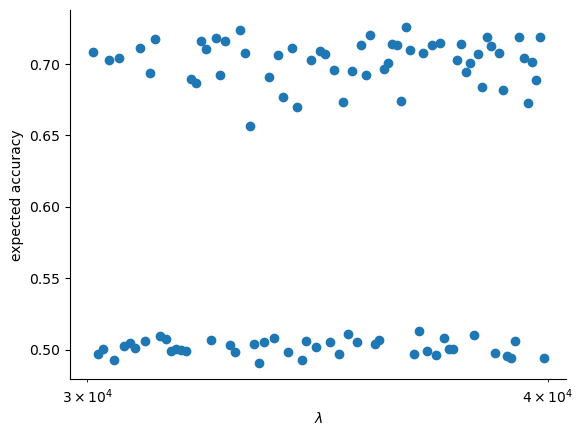

In [6]:
plt.scatter(lambdas, accs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('expected accuracy')
sns.despine()

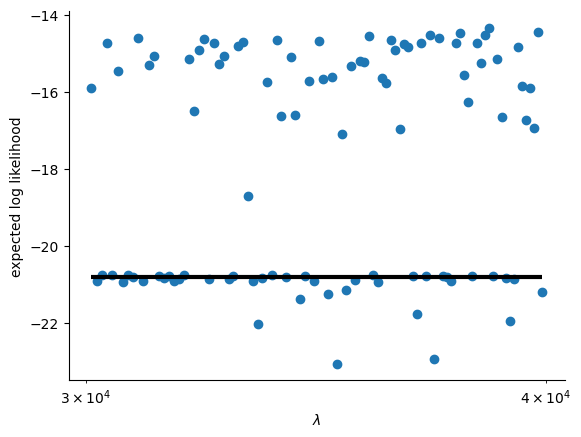

In [7]:
plt.scatter(lambdas, logs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('expected log likelihood')
plt.hlines(np.log(1/2)*30, xmin=lambdas[0], xmax=lambdas[-1], color='k', lw=3)
sns.despine()

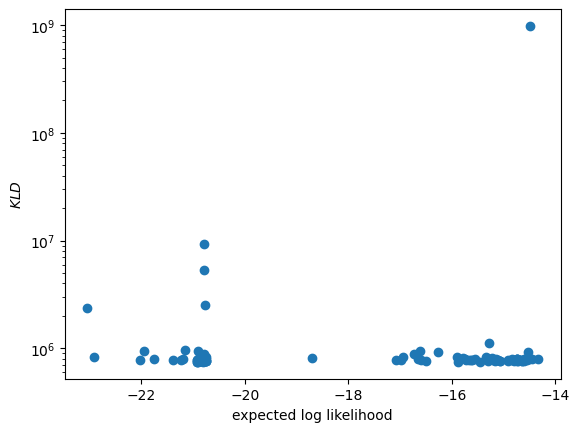

In [22]:
#save_klds(data='claude_generated_functionlearningtasks_paramsNA_dim2_data20_tasks9254_run0_procid0_pversion2_unknown', env='claude_dim2', max_steps=10, num_inputs=2)
data_klds = pd.read_csv('/u/ajagadish/ermi/decisionmaking/data/stats/klds_claude_dim2.csv')
plt.scatter(logs, data_klds.kld.values[4:-6])
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('expected log likelihood')
plt.ylabel('$KLD$')
plt.show()

In [87]:
experiment_id=1
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_rank = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=rank_loss=nll_paired=True_policy=greedy_ess=NA.npz')
results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=NA.npz')
results_mi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=synthetic_condition=unknown_loss=nll_paired=True_policy=greedy_ess=NA.npz')


plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI (Unknown)')
plt.errorbar(x=np.arange(10), y=(results_mi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_mi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='MI')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_rank['per_trial_human_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_rank['human_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), c='k', lw=2, label='Human')
             
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=1_source=claude_condition=rank_loss=nll_paired=True_policy=greedy_ess=NA.npz'

In [ ]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
ginis_ermi = np.zeros_like(results_ermi_paired_rank['model_coefficients'][...,[0]])
ginis_ermi_unknown = np.zeros_like(results_ermi_paired_rank['model_coefficients'][...,[0]])
ginis_mi = np.zeros_like(results_mi_paired_unknown['model_coefficients'][...,[0]])
for participant in range(results_ermi_paired_rank['model_coefficients'].shape[0]):
    for task in range(results_ermi_paired_rank['model_coefficients'].shape[1]):
        for trial in range(results_ermi_paired_rank['model_coefficients'].shape[2]):
            ginis_ermi[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_rank['model_coefficients'][participant, task, trial]))
            ginis_ermi_unknown[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_unknown['model_coefficients'][participant, task, trial]))
            ginis_mi[participant, task, trial]= gini_compute(np.abs(results_mi_paired_unknown['model_coefficients'][participant, task, trial]))

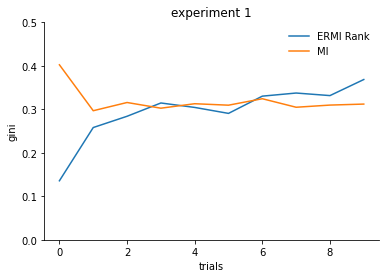

In [22]:
plt.plot(ginis_ermi.squeeze().mean(1).mean(0), label='ERMI Rank')
plt.plot(ginis_mi.squeeze().mean(1).mean(0), label='MI')
# plt.plot(ginis_ermi_unknown.squeeze().mean(1).mean(0), label='ERMI Unknown')
plt.ylim([0., 0.5])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

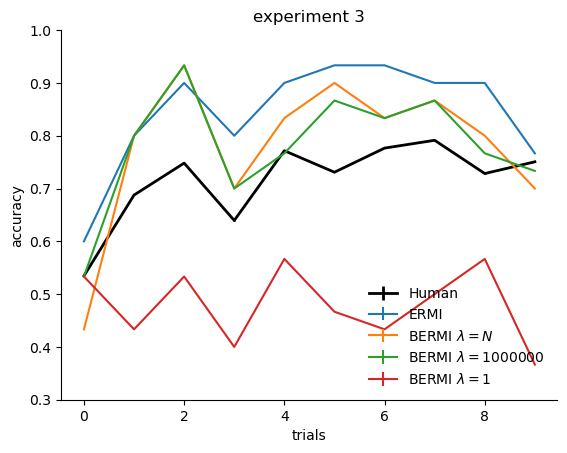

In [21]:
experiment_id=3
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')
num_tasks = data.task.max()+1
policy='greedy'
data = pd.read_csv(f'/u/ajagadish/ermi/decisionmaking/data/human/binz2022heuristics_exp{experiment_id}.csv')

results_ermi_paired_unknown = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy.npz')
results_bermi_paired_ess1 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_essNone.npz')
results_bermi_paired_ess2 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment={experiment_id}_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess1000000.0.npz')
results_bermi_paired_ess3 = np.load(f'/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz')

plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_human_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['human_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), c='k', lw=2, label='Human')
plt.errorbar(x=np.arange(10), y=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_ermi_paired_unknown['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='ERMI')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess1['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess1['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=N$')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess2['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess2['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=1000000$')
plt.errorbar(x=np.arange(10), y=(results_bermi_paired_ess3['per_trial_model_accuracy']/num_tasks).mean(0),yerr=(results_bermi_paired_ess3['per_trial_model_accuracy']/num_tasks).std(0)/np.sqrt(num_tasks), label='BERMI $\lambda=1$')

                                    
plt.ylabel('accuracy')
plt.xlabel('trials')
plt.ylim(0.3, 1.) # set y axis limit between 0.5 and 1.
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

In [23]:
results_bermi_paired_ess3.__dict__

{'_files': ['model_accuracy.npy',
  'per_trial_model_accuracy.npy',
  'human_accuracy.npy',
  'per_trial_human_accuracy.npy',
  'model_coefficients.npy'],
 'files': ['model_accuracy',
  'per_trial_model_accuracy',
  'human_accuracy',
  'per_trial_human_accuracy',
  'model_coefficients'],
 'allow_pickle': False,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x15023be8fd60>,
 'fid': <_io.BufferedReader name='/u/ajagadish/ermi/decisionmaking/data/model_simulation/task=binz2022_experiment=3_source=claude_condition=unknown_loss=nll_paired=True_policy=greedy_ess=1.0.npz'>}

In [14]:
def gini_compute(x):
        mad = np.abs(np.subtract.outer(x, x)).mean()
        rmad = mad/np.mean(x)
        return 0.5 * rmad
    
ginis_ermi = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
ginis_bermi_N = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
ginis_bermi_1 = np.zeros_like(results_ermi_paired_unknown['model_coefficients'][...,[0]])
for participant in range(results_ermi_paired_unknown['model_coefficients'].shape[0]):
    for task in range(results_ermi_paired_unknown['model_coefficients'].shape[1]):
        for trial in range(results_ermi_paired_unknown['model_coefficients'].shape[2]):
            ginis_ermi[participant, task, trial]= gini_compute(np.abs(results_ermi_paired_unknown['model_coefficients'][participant, task, trial]))
            ginis_bermi_N[participant, task, trial]= gini_compute(np.abs(results_bermi_paired_ess1['model_coefficients'][participant, task, trial]))
            ginis_bermi_1[participant, task, trial]= gini_compute(np.abs(results_bermi_paired_ess3['model_coefficients'][participant, task, trial]))

plt.plot(ginis_ermi.squeeze().mean(1).mean(0), label='ERMI')
plt.plot(ginis_bermi_N.squeeze().mean(1).mean(0), label='BERMI $\lambda=N$')
plt.plot(ginis_bermi_1.squeeze().mean(1).mean(0), label='BERMI $\lambda=1$')
plt.ylim([0., 0.5])
plt.ylabel('gini')
plt.xlabel('trials')
sns.despine()
plt.legend(loc='lower right')
plt.title(f"experiment {experiment_id}")
plt.legend(frameon=False)
plt.show()

KeyError: 'model_coefficients is not a file in the archive'